In [1]:
#Import libraries for diabetes model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
#Exclude the header always
#index_col="insulin"
column_names=['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin thickness', 'Insulin', 'BMI', 'Pedigree function', 'Age', 'Label']
data_set=pd.read_csv("C:\\Users\\Hevanthika\\Downloads\\Pima-Indians-Diabetes-dataset\\pima_indians_diabetes.csv", header=None, names=column_names, skiprows=(0,0))

In [3]:
data_set.head()

,Pregnancies,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,Pedigree function,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Exploratory data analysis
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   Blood Pressure     768 non-null    int64  
 3   Skin thickness     768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   Pedigree function  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Label              768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_set.describe()

,Pregnancies,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,Pedigree function,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#conversion of string into number step, in our case all are numeric so this step is not needed
convert_col=['Pregnancies', 'Glucose', 'Blood Pressure', 'Insulin', 'BMI', 'Pedigree function', 'Age']
for col in convert_col:
    data_set[col]=pd.to_numeric(data_set[col])

In [7]:
#Feature selection
feature_columns=['Pregnancies', 'Glucose', 'Blood Pressure', 'Insulin', 'BMI', 'Pedigree function', 'Age']
X=data_set[feature_columns]
y=data_set.Label
X.describe()

,Pregnancies,Glucose,Blood Pressure,Insulin,BMI,Pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000


Text(0.5, 249.0, 'Feature values on X axis')

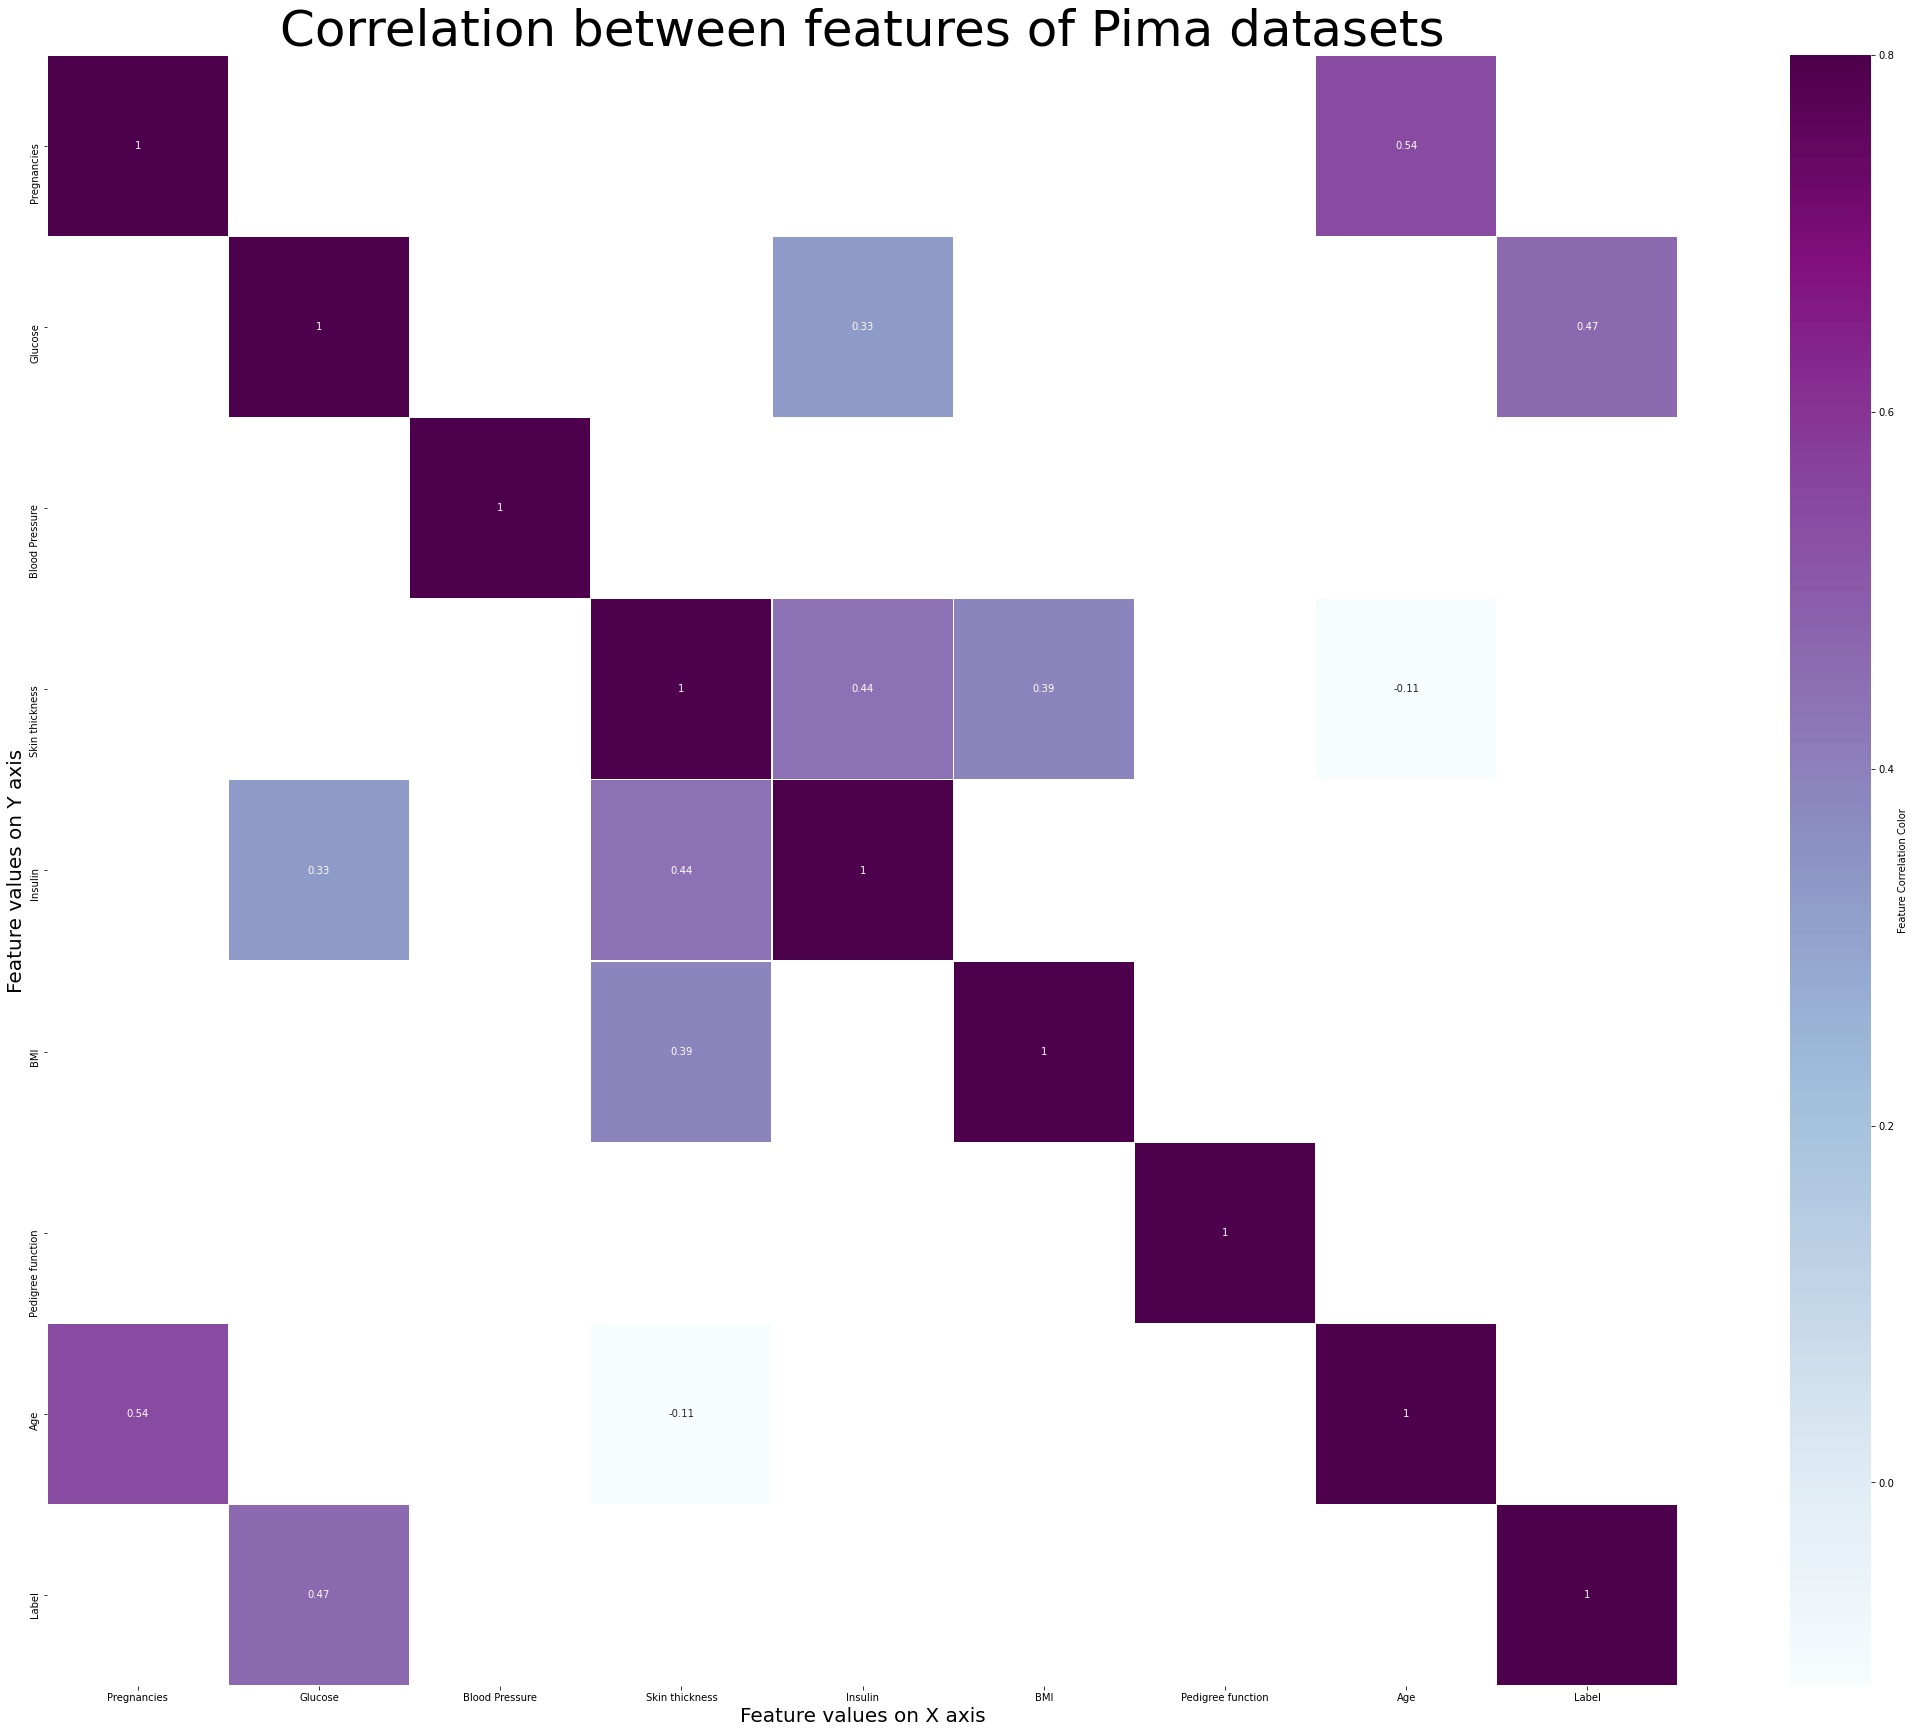

In [8]:
#Checking correlation and correlation plot
corr=data_set.corr()
plt.figure(figsize=(40,30))

corr_range=corr[(corr>=0.3) | (corr<=-0.1)]
dataplot=sns.heatmap(corr_range, vmax=0.8, linewidth=0.01, square=True, annot=True, cmap='BuPu', linecolor='white', cbar_kws={'label': 'Feature Correlation Color'})
#plt.title="Correlation between features of Pima datasets"
plt.title("Correlation between features of Pima datasets", fontsize=50)
plt.ylabel('Feature values on Y axis', fontsize=20)
plt.xlabel('Feature values on X axis', fontsize=20)

In [9]:
#Splitting the dataset into test and training, 8-20 format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
#Applying Logistic regression algorithm
logistic_function=LogisticRegression()

In [11]:
#Fit the model with the training data
logistic_function.fit(X_train, y_train)
y_prediction=logistic_function.predict(X_test)
#To see the y prediction data
display(y_prediction)

C:\Users\Hevanthika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [12]:
#Model evaluation using confusion matrix  for the performance of classification model
from sklearn import metrics

cnf_matrix_evaluation=metrics.confusion_matrix(y_test, y_prediction)
cnf_matrix_evaluation
#display(cnf_matrix_evaluation)

array([[79, 20],
       [19, 36]], dtype=int64)

In [13]:
#Visualization of confusion matrix using heatmap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

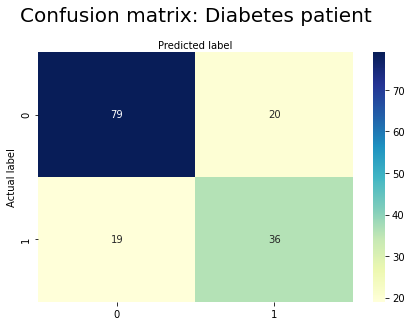

In [14]:
class_names=[0,1] #naming the classes
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Creating the heatmap for getting the confusion matrix
#Shows true positive, true negative, false positive and false negative outcomes
plot=sns.heatmap(pd.DataFrame(cnf_matrix_evaluation), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
#plt.title='Confusion matrix: Diabetes patient', y=1.1
plt.title('Confusion matrix: Diabetes patient', fontsize=20, y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
#Confusion matrix conclusion for the evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1:", metrics.f1_score(y_test, y_prediction))
print(metrics.accuracy_score(y_test, y_prediction)*100, "% :", "Chances of person having diabetes in the present dataset")

print(y_prediction)

Accuracy: 0.7467532467532467
Precision: 0.6428571428571429
Recall: 0.6545454545454545
F1: 0.6486486486486486
74.67532467532467 % : Chances of person having diabetes in the present dataset
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


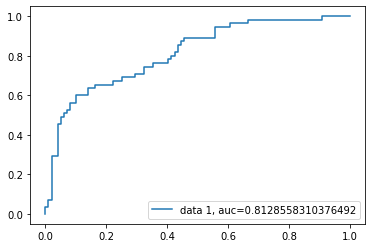

In [16]:
#Performance evaluation using the ROC(Receiver Operating Characteristic) curve
#It shows the tradeoff between sensitivity and specificity
y_prediction_probability=logistic_function.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prediction_probability)
auc=metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Note:AUC score for the case is 0.81, AUC score 1 represents a perfect classifier, 0.5 represents a worthless classifier

In [17]:
from sklearn.metrics import f1_score

In [18]:
#f1_score(y_test, y_prediction, average='weighted')
f1_score(y_test, y_prediction, average=None)
#f1_score(y_test, y_prediction, average='macro')

array([0.80203046, 0.64864865])